
#### Einfluss von Heimathafen und Fluggesellschaft auf die Ankunftsverspätung
Im Folgenden sehen Sie einen Verlauf, in dem ich angefangen habe, den Einfluss von Heimatflughafen und Fluggesellschaft auf die Ankunftsverspätung anzuschauen: (Ich zeige absichtlich keine "perfekte" Analyse. Bei der explorativen Datenanalyse geht es um das Explorieren, meist erstellt man viele, viele Graphen und bekommt im Verlauf ein immer besseres Gefühl für den Datensatz und dabei stolpert man (hoffentlich ;-)) immer mal wieder über interessante Zusammenhänge.) 

In [1]:
#Nötige Module importieren
#Daten einlesen und Daten verarbeiten
import pandas as pd
#Plotten
import matplotlib.pyplot as plt
#zum (einfacheren) Erstellen guter statistischer Plots:
import seaborn as sns
sns.set_theme()  # alle Plots (auch von matplotlib) im seaborn-Style
# Numerische und statistisches Werkzeug
import numpy as np
from scipy import stats

In [2]:
from nycflights13 import flights
fls = flights.dropna()
fls.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


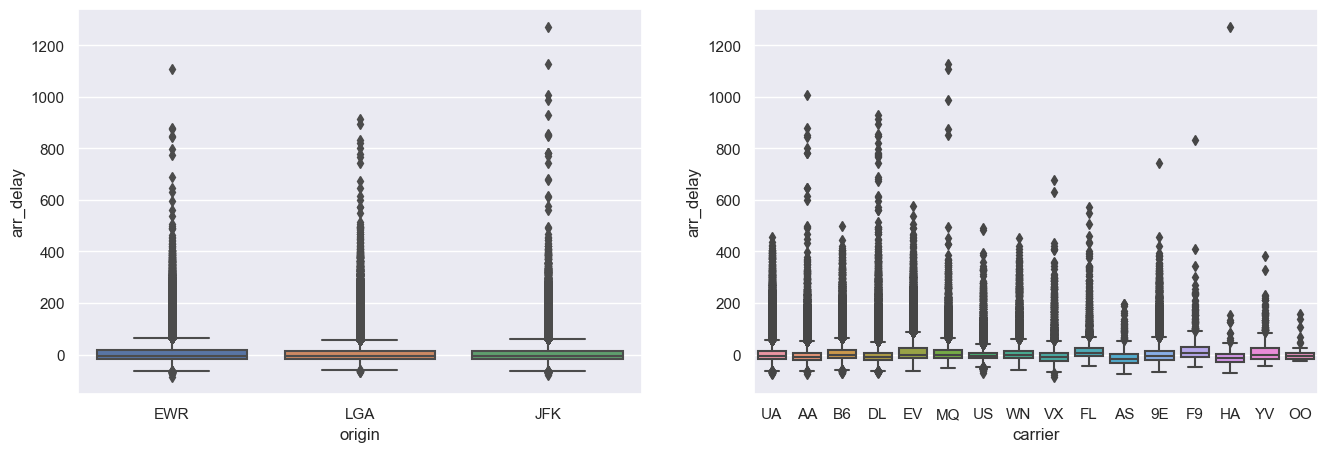

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x="origin", y="arr_delay", data=fls, ax=axs[0])
sns.boxplot(x="carrier", y="arr_delay", data=fls, ax=axs[1])
plt.show()  # zeigt die Grafik an, ohne die Objektinformationen auszugeben

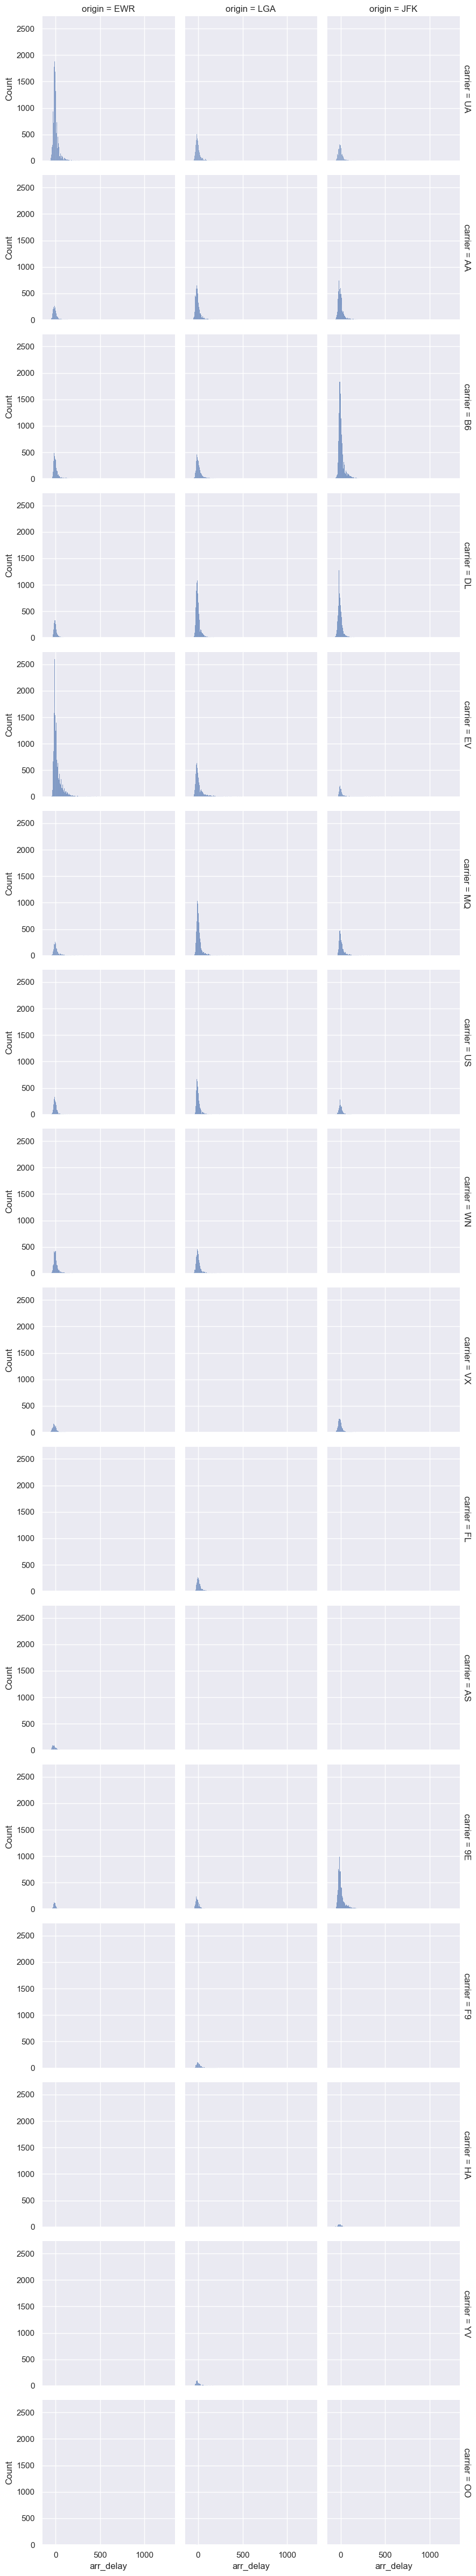

In [6]:
# In einem FacetGrid können zwei Variablen gleichzeitig betrachtet werden
# plot histograms in facetgrid of arr_delay for each carrier and origin
grid = sns.FacetGrid(data=fls, row="carrier", col="origin", margin_titles=True)
grid.map(sns.histplot, "arr_delay")
plt.show()

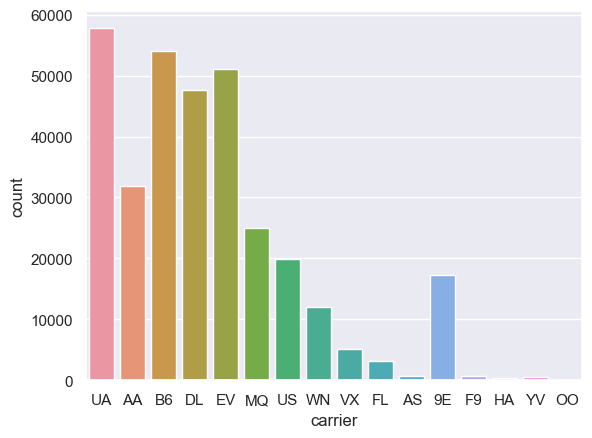

In [7]:
#Hm, das ist sehr unübersichtlich und einige Felder sind leer. Vielleicht betrachte ich zunächst nur die häufigsten Carrier?
sns.countplot(x='carrier', data=fls);

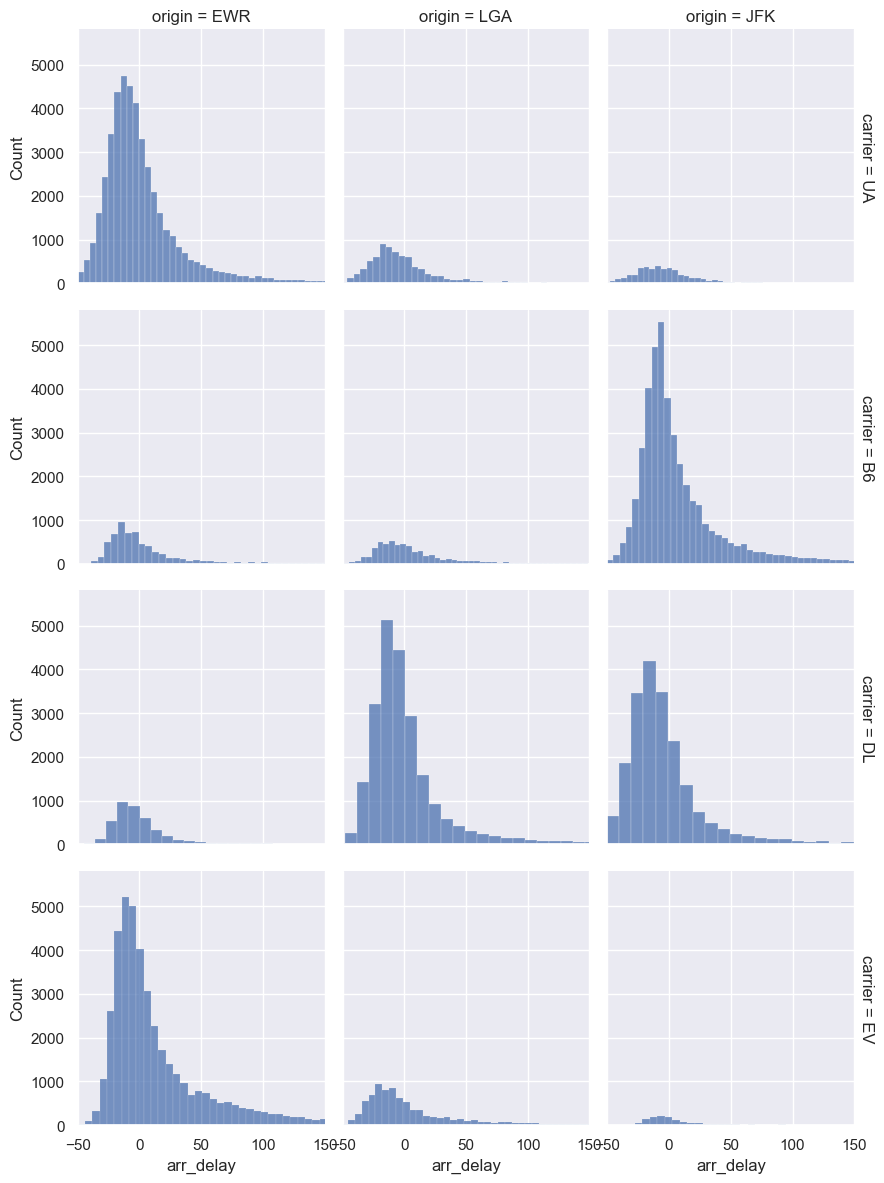

In [8]:
"""
FacetGrid für Histogramme des arr_delay für jeden Abflughafen für die vier häufigsten Fluggesellschaften (UA, B6, EV und DL)
"""
#fls1 = fls[fls["carrier"].isin(fls["carrier"].value_counts().head(4).index)]
fls1 = fls[fls["carrier"].isin(["UA", "B6", "EV", "DL"])]

grid = sns.FacetGrid(fls1, row="carrier", col="origin", margin_titles=True)
grid.map(sns.histplot, "arr_delay",bins=100)
grid.set(xlim=(-50, 150))
plt.show()


UA und EV sehen sehr ähnlich aus. Hier könnte man jetzt überlegen, ob es weitere Gemeinsamkeiten zwischen den Flügen dieser Carrier gibt. Ähnliche Zielflughäfen z.B.?....

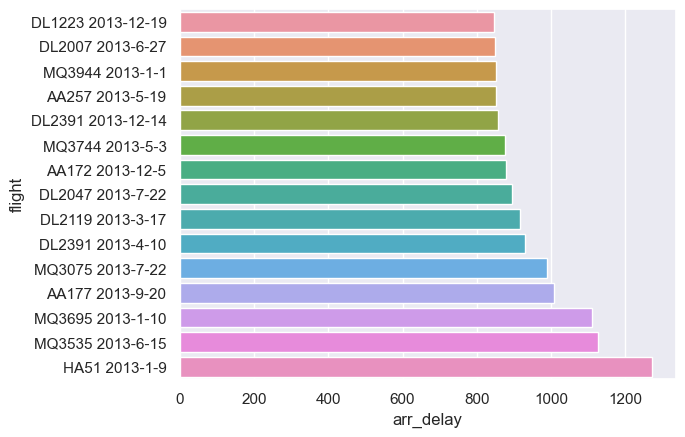

In [9]:
#Mir ist auch aufgefallen, dass es ein paar extrem verspätete Flüge gab, da möchte ich mal die 15 extremsten sehen:
#Erstellen einer Liste mit den 15 Flügen mit den größten Verspätungen
fls4 = fls.sort_values("arr_delay", ascending=True)[-15:]
#Barplot der 15 Flüge mit den größten Verspätungen
sns.barplot(x="arr_delay", y="tailnum", data=fls4)
plt.ylabel("flight")
plt.yticks(range(15), fls4["carrier"] + fls4["flight"].astype(str) + " " + fls4["year"].astype(str) + "-" + fls4["month"].astype(str) + "-" + fls4["day"].astype(str))
plt.show()